In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bert/keras/bert_base_multi/2/config.json
/kaggle/input/bert/keras/bert_base_multi/2/tokenizer.json
/kaggle/input/bert/keras/bert_base_multi/2/metadata.json
/kaggle/input/bert/keras/bert_base_multi/2/model.weights.h5
/kaggle/input/bert/keras/bert_base_multi/2/assets/tokenizer/vocabulary.txt
/kaggle/input/contradictory-my-dear-watson/sample_submission.csv
/kaggle/input/contradictory-my-dear-watson/train.csv
/kaggle/input/contradictory-my-dear-watson/test.csv


In [2]:
#import lib here...
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras_nlp
import seaborn as sns

2024-04-22 10:53:53.380452: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 10:53:53.380591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 10:53:53.651759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_df = pd.read_csv('/kaggle/input/contradictory-my-dear-watson/train.csv')
test_df = pd.read_csv('/kaggle/input/contradictory-my-dear-watson/test.csv')

In [4]:
train_df.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [5]:
train_df.drop(columns=['id'],inplace=False)

,premise,hypothesis,lang_abv,language,label
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...
12115,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5195 non-null   object
 1   premise     5195 non-null   object
 2   hypothesis  5195 non-null   object
 3   lang_abv    5195 non-null   object
 4   language    5195 non-null   object
dtypes: object(5)
memory usage: 203.1+ KB


Let's see how much different languages contribute to the data set...
what is the ratio of different label 0,1,2 in the train_data_set...

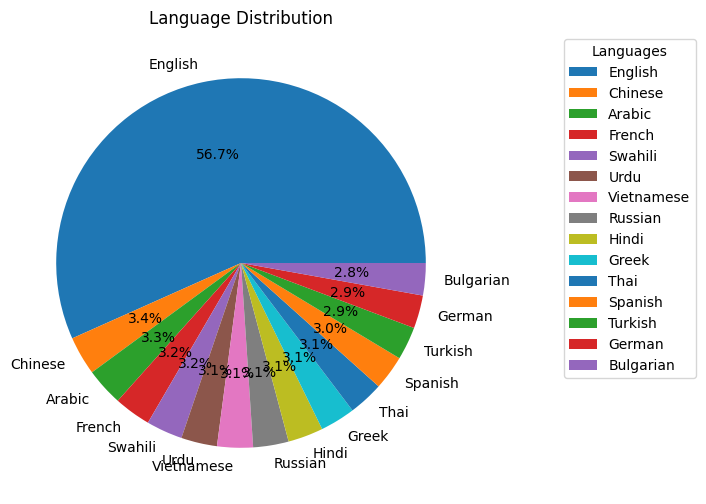

In [8]:
lang_cnt = train_df['language'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(lang_cnt,labels=lang_cnt.index,autopct='%1.1f%%')

plt.title('Language Distribution')

plt.legend(lang_cnt.index, title="Languages", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

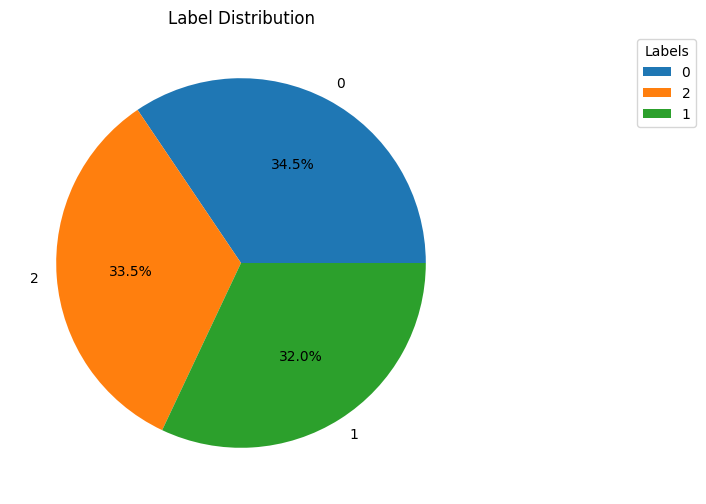

In [9]:
label_cnt = train_df['label'].value_counts()

plt.figure(figsize=(10,6))

plt.pie(label_cnt,labels=label_cnt.index,autopct='%1.1f%%')

plt.title('Label Distribution')

plt.legend(label_cnt.index, title="Labels", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [10]:
train_df.shape

(12120, 6)

In [11]:
try:
    # detect and init the TPU
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    # instantiate a distribution strategy
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("TPU not activated")
    strategy = tf.distribute.MirroredStrategy() # Works on CPU, single GPU and multiple GPUs in a single VM.
    
print("replicas:", strategy.num_replicas_in_sync)

TPU not activated
replicas: 1


In [12]:
VALIDATION_SPLIT = 0.3
TRAIN_SIZE = int(train_df.shape[0]*(1-VALIDATION_SPLIT))
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

In [13]:
def split_labels(x,y):
    return (x[0],x[1]), y
 
train_data = (
    tf.data.Dataset.from_tensor_slices(
        (
            train_df[['premise','hypothesis']].values,
            keras.utils.to_categorical(train_df['label'],num_classes=3)
        )
    )
)

train_data = train_data.take(TRAIN_SIZE)
val_data = train_data.skip(TRAIN_SIZE)


train_preprocessed = train_data.map(split_labels,tf.data.AUTOTUNE).batch(BATCH_SIZE,drop_remainder=True).cache().prefetch(tf.data.AUTOTUNE)

val_preprocessed = val_data.map(split_labels,tf.data.AUTOTUNE).batch(BATCH_SIZE,drop_remainder=True).cache().prefetch(tf.data.AUTOTUNE)

We will usinf BERT model here -->
Load a Bert model from Kera NLP -> train the model...

In [14]:
#load a BERT model...

with strategy.scope():
    classifier = keras_nlp.models.BertClassifier.from_preset("bert_base_multi", num_classes=3)
    
    #in distributed training, the recommendation is to scale batch size and learning rate with the number of workers...
    classifier.compile(optimizer=keras.optimizers.Adam(1e-5*strategy.num_replicas_in_sync), loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
    
    classifier.summary()

Attaching 'config.json' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...


Attaching 'config.json' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...


Attaching 'model.weights.h5' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...


Attaching 'tokenizer.json' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...


Attaching 'assets/tokenizer/vocabulary.txt' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...


Preprocessor: "bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                             119,547 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 768), (None,      │     177,853,440 │ padding_mask[0][0],        │
│                               │ None, 768)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 768)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 3)                 │           2,307 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 177,855,747 (678.47 MB)

 Trainable params: 177,855,747 (678.47 MB)

 Non-trainable params: 0 (0.00 B)

Now, Let's train our own model - Fine-tuning BERT...

In [15]:
Epochs = 3
history = classifier.fit(train_preprocessed,epochs=Epochs,validation_data=val_preprocessed)

Epoch 1/3


  1/530 ━━━━━━━━━━━━━━━━━━━━ 18:14:30 124s/step - accuracy: 0.5625 - loss: 1.0670

  2/530 ━━━━━━━━━━━━━━━━━━━━ 9:45:51 67s/step - accuracy: 0.5000 - loss: 1.0851  

  3/530 ━━━━━━━━━━━━━━━━━━━━ 10:35:50 72s/step - accuracy: 0.4861 - loss: 1.0834

  4/530 ━━━━━━━━━━━━━━━━━━━━ 10:13:45 70s/step - accuracy: 0.4701 - loss: 1.0846

  5/530 ━━━━━━━━━━━━━━━━━━━━ 10:01:57 69s/step - accuracy: 0.4610 - loss: 1.0861

  6/530 ━━━━━━━━━━━━━━━━━━━━ 9:51:48 68s/step - accuracy: 0.4554 - loss: 1.0867 

  7/530 ━━━━━━━━━━━━━━━━━━━━ 9:47:42 67s/step - accuracy: 0.4503 - loss: 1.0882

  8/530 ━━━━━━━━━━━━━━━━━━━━ 9:40:12 67s/step - accuracy: 0.4428 - loss: 1.0906

  9/530 ━━━━━━━━━━━━━━━━━━━━ 9:34:06 66s/step - accuracy: 0.4368 - loss: 1.0926

 10/530 ━━━━━━━━━━━━━━━━━━━━ 9:28:45 66s/step - accuracy: 0.4325 - loss: 1.0940

 11/530 ━━━━━━━━━━━━━━━━━━━━ 9:24:37 65s/step - accuracy: 0.4278 - loss: 1.0955

 12/530 ━━━━━━━━━━━━━━━━━━━━ 9:24:56 65s/step - accuracy: 0.4247 - loss: 1.0964

 13/530 ━━━━━━━━━━━━━━━━━━━━ 9:31:30 66s/step - accuracy: 0.4209 - loss: 1.0974

 14/530 ━━━━━━━━━━━━━━━━━━━━ 9:28:22 66s/step - accuracy: 0.4182 - loss: 1.0980

 15/530 ━━━━━━━━━━━━━━━━━━━━ 9:26:39 66s/step - accuracy: 0.4165 - loss: 1.0984

 16/530 ━━━━━━━━━━━━━━━━━━━━ 9:24:19 66s/step - accuracy: 0.4149 - loss: 1.0988

 17/530 ━━━━━━━━━━━━━━━━━━━━ 9:21:00 66s/step - accuracy: 0.4127 - loss: 1.0992

 18/530 ━━━━━━━━━━━━━━━━━━━━ 9:18:15 65s/step - accuracy: 0.4108 - loss: 1.0995

 19/530 ━━━━━━━━━━━━━━━━━━━━ 9:15:35 65s/step - accuracy: 0.4088 - loss: 1.0998

 20/530 ━━━━━━━━━━━━━━━━━━━━ 9:12:50 65s/step - accuracy: 0.4068 - loss: 1.1000

 21/530 ━━━━━━━━━━━━━━━━━━━━ 9:09:57 65s/step - accuracy: 0.4051 - loss: 1.1002

 22/530 ━━━━━━━━━━━━━━━━━━━━ 9:15:35 66s/step - accuracy: 0.4034 - loss: 1.1004

 23/530 ━━━━━━━━━━━━━━━━━━━━ 9:13:48 66s/step - accuracy: 0.4021 - loss: 1.1005

 24/530 ━━━━━━━━━━━━━━━━━━━━ 9:10:41 65s/step - accuracy: 0.4010 - loss: 1.1006

 25/530 ━━━━━━━━━━━━━━━━━━━━ 9:07:47 65s/step - accuracy: 0.4003 - loss: 1.1006

 26/530 ━━━━━━━━━━━━━━━━━━━━ 9:05:15 65s/step - accuracy: 0.3997 - loss: 1.1006

 27/530 ━━━━━━━━━━━━━━━━━━━━ 9:04:19 65s/step - accuracy: 0.3990 - loss: 1.1005

 28/530 ━━━━━━━━━━━━━━━━━━━━ 9:02:05 65s/step - accuracy: 0.3982 - loss: 1.1005

 29/530 ━━━━━━━━━━━━━━━━━━━━ 8:59:52 65s/step - accuracy: 0.3972 - loss: 1.1006

 30/530 ━━━━━━━━━━━━━━━━━━━━ 8:57:48 65s/step - accuracy: 0.3962 - loss: 1.1005

 31/530 ━━━━━━━━━━━━━━━━━━━━ 8:55:46 64s/step - accuracy: 0.3955 - loss: 1.1005

 32/530 ━━━━━━━━━━━━━━━━━━━━ 8:58:29 65s/step - accuracy: 0.3947 - loss: 1.1004

 33/530 ━━━━━━━━━━━━━━━━━━━━ 8:57:27 65s/step - accuracy: 0.3940 - loss: 1.1003

 34/530 ━━━━━━━━━━━━━━━━━━━━ 8:56:10 65s/step - accuracy: 0.3934 - loss: 1.1003

 35/530 ━━━━━━━━━━━━━━━━━━━━ 8:54:13 65s/step - accuracy: 0.3928 - loss: 1.1002

 36/530 ━━━━━━━━━━━━━━━━━━━━ 8:52:15 65s/step - accuracy: 0.3922 - loss: 1.1001

 37/530 ━━━━━━━━━━━━━━━━━━━━ 8:50:19 65s/step - accuracy: 0.3917 - loss: 1.1001

 38/530 ━━━━━━━━━━━━━━━━━━━━ 8:48:16 64s/step - accuracy: 0.3912 - loss: 1.1000

 39/530 ━━━━━━━━━━━━━━━━━━━━ 8:46:18 64s/step - accuracy: 0.3905 - loss: 1.1000

 40/530 ━━━━━━━━━━━━━━━━━━━━ 8:44:07 64s/step - accuracy: 0.3899 - loss: 1.1000

 41/530 ━━━━━━━━━━━━━━━━━━━━ 8:41:58 64s/step - accuracy: 0.3893 - loss: 1.1000

 42/530 ━━━━━━━━━━━━━━━━━━━━ 8:43:21 64s/step - accuracy: 0.3886 - loss: 1.1000

 43/530 ━━━━━━━━━━━━━━━━━━━━ 8:41:45 64s/step - accuracy: 0.3879 - loss: 1.1000

 44/530 ━━━━━━━━━━━━━━━━━━━━ 8:39:36 64s/step - accuracy: 0.3871 - loss: 1.1001

 45/530 ━━━━━━━━━━━━━━━━━━━━ 8:37:39 64s/step - accuracy: 0.3864 - loss: 1.1001

 46/530 ━━━━━━━━━━━━━━━━━━━━ 8:35:43 64s/step - accuracy: 0.3857 - loss: 1.1001

 47/530 ━━━━━━━━━━━━━━━━━━━━ 8:33:50 64s/step - accuracy: 0.3851 - loss: 1.1002

 48/530 ━━━━━━━━━━━━━━━━━━━━ 8:32:00 64s/step - accuracy: 0.3844 - loss: 1.1002

 49/530 ━━━━━━━━━━━━━━━━━━━━ 8:30:12 64s/step - accuracy: 0.3839 - loss: 1.1002

 50/530 ━━━━━━━━━━━━━━━━━━━━ 8:28:49 64s/step - accuracy: 0.3832 - loss: 1.1002

 51/530 ━━━━━━━━━━━━━━━━━━━━ 8:27:28 64s/step - accuracy: 0.3826 - loss: 1.1002

 52/530 ━━━━━━━━━━━━━━━━━━━━ 8:29:40 64s/step - accuracy: 0.3820 - loss: 1.1002

 53/530 ━━━━━━━━━━━━━━━━━━━━ 8:29:06 64s/step - accuracy: 0.3815 - loss: 1.1002

 54/530 ━━━━━━━━━━━━━━━━━━━━ 8:29:28 64s/step - accuracy: 0.3809 - loss: 1.1002

 55/530 ━━━━━━━━━━━━━━━━━━━━ 8:28:02 64s/step - accuracy: 0.3804 - loss: 1.1002

 56/530 ━━━━━━━━━━━━━━━━━━━━ 8:26:30 64s/step - accuracy: 0.3798 - loss: 1.1002

 57/530 ━━━━━━━━━━━━━━━━━━━━ 8:24:58 64s/step - accuracy: 0.3793 - loss: 1.1003

 58/530 ━━━━━━━━━━━━━━━━━━━━ 8:23:27 64s/step - accuracy: 0.3788 - loss: 1.1003

 59/530 ━━━━━━━━━━━━━━━━━━━━ 8:21:53 64s/step - accuracy: 0.3783 - loss: 1.1003

 60/530 ━━━━━━━━━━━━━━━━━━━━ 8:20:26 64s/step - accuracy: 0.3778 - loss: 1.1003

 61/530 ━━━━━━━━━━━━━━━━━━━━ 8:19:00 64s/step - accuracy: 0.3773 - loss: 1.1003

 62/530 ━━━━━━━━━━━━━━━━━━━━ 8:20:00 64s/step - accuracy: 0.3768 - loss: 1.1003

 63/530 ━━━━━━━━━━━━━━━━━━━━ 8:18:45 64s/step - accuracy: 0.3763 - loss: 1.1003

 64/530 ━━━━━━━━━━━━━━━━━━━━ 8:17:17 64s/step - accuracy: 0.3759 - loss: 1.1003

 65/530 ━━━━━━━━━━━━━━━━━━━━ 8:15:51 64s/step - accuracy: 0.3755 - loss: 1.1003

 66/530 ━━━━━━━━━━━━━━━━━━━━ 8:14:26 64s/step - accuracy: 0.3751 - loss: 1.1003

 67/530 ━━━━━━━━━━━━━━━━━━━━ 8:13:03 64s/step - accuracy: 0.3747 - loss: 1.1003

 68/530 ━━━━━━━━━━━━━━━━━━━━ 8:11:41 64s/step - accuracy: 0.3743 - loss: 1.1003

 69/530 ━━━━━━━━━━━━━━━━━━━━ 8:10:18 64s/step - accuracy: 0.3740 - loss: 1.1002

 70/530 ━━━━━━━━━━━━━━━━━━━━ 8:08:57 64s/step - accuracy: 0.3737 - loss: 1.1002

 71/530 ━━━━━━━━━━━━━━━━━━━━ 8:07:34 64s/step - accuracy: 0.3734 - loss: 1.1002

 72/530 ━━━━━━━━━━━━━━━━━━━━ 8:08:05 64s/step - accuracy: 0.3731 - loss: 1.1002

 73/530 ━━━━━━━━━━━━━━━━━━━━ 8:06:56 64s/step - accuracy: 0.3728 - loss: 1.1002

 74/530 ━━━━━━━━━━━━━━━━━━━━ 8:05:31 64s/step - accuracy: 0.3725 - loss: 1.1002

 75/530 ━━━━━━━━━━━━━━━━━━━━ 8:04:06 64s/step - accuracy: 0.3722 - loss: 1.1002

 76/530 ━━━━━━━━━━━━━━━━━━━━ 8:02:38 64s/step - accuracy: 0.3719 - loss: 1.1002

 77/530 ━━━━━━━━━━━━━━━━━━━━ 8:01:11 64s/step - accuracy: 0.3717 - loss: 1.1002

 78/530 ━━━━━━━━━━━━━━━━━━━━ 7:59:38 64s/step - accuracy: 0.3715 - loss: 1.1002

 79/530 ━━━━━━━━━━━━━━━━━━━━ 7:58:07 64s/step - accuracy: 0.3712 - loss: 1.1001

 80/530 ━━━━━━━━━━━━━━━━━━━━ 7:56:42 64s/step - accuracy: 0.3710 - loss: 1.1001

 81/530 ━━━━━━━━━━━━━━━━━━━━ 7:55:22 64s/step - accuracy: 0.3707 - loss: 1.1001

 82/530 ━━━━━━━━━━━━━━━━━━━━ 7:55:34 64s/step - accuracy: 0.3705 - loss: 1.1001

 83/530 ━━━━━━━━━━━━━━━━━━━━ 7:54:25 64s/step - accuracy: 0.3703 - loss: 1.1001

 84/530 ━━━━━━━━━━━━━━━━━━━━ 7:52:57 64s/step - accuracy: 0.3701 - loss: 1.1001

 85/530 ━━━━━━━━━━━━━━━━━━━━ 7:51:30 64s/step - accuracy: 0.3699 - loss: 1.1001

 86/530 ━━━━━━━━━━━━━━━━━━━━ 7:50:04 64s/step - accuracy: 0.3698 - loss: 1.1000

 87/530 ━━━━━━━━━━━━━━━━━━━━ 7:48:39 63s/step - accuracy: 0.3696 - loss: 1.1000

 88/530 ━━━━━━━━━━━━━━━━━━━━ 7:47:13 63s/step - accuracy: 0.3695 - loss: 1.1000

 89/530 ━━━━━━━━━━━━━━━━━━━━ 7:45:53 63s/step - accuracy: 0.3693 - loss: 1.1000

 90/530 ━━━━━━━━━━━━━━━━━━━━ 7:44:40 63s/step - accuracy: 0.3692 - loss: 1.0999

 91/530 ━━━━━━━━━━━━━━━━━━━━ 7:43:25 63s/step - accuracy: 0.3691 - loss: 1.0999

 92/530 ━━━━━━━━━━━━━━━━━━━━ 7:43:48 64s/step - accuracy: 0.3691 - loss: 1.0999

 93/530 ━━━━━━━━━━━━━━━━━━━━ 7:42:48 64s/step - accuracy: 0.3690 - loss: 1.0998

 94/530 ━━━━━━━━━━━━━━━━━━━━ 7:41:28 64s/step - accuracy: 0.3689 - loss: 1.0998

 95/530 ━━━━━━━━━━━━━━━━━━━━ 7:40:18 63s/step - accuracy: 0.3689 - loss: 1.0997

 96/530 ━━━━━━━━━━━━━━━━━━━━ 7:38:58 63s/step - accuracy: 0.3688 - loss: 1.0997

 97/530 ━━━━━━━━━━━━━━━━━━━━ 7:37:38 63s/step - accuracy: 0.3688 - loss: 1.0997

 98/530 ━━━━━━━━━━━━━━━━━━━━ 7:36:21 63s/step - accuracy: 0.3688 - loss: 1.0996

 99/530 ━━━━━━━━━━━━━━━━━━━━ 7:35:02 63s/step - accuracy: 0.3688 - loss: 1.0995

100/530 ━━━━━━━━━━━━━━━━━━━━ 7:33:43 63s/step - accuracy: 0.3688 - loss: 1.0995

101/530 ━━━━━━━━━━━━━━━━━━━━ 7:32:22 63s/step - accuracy: 0.3688 - loss: 1.0994

102/530 ━━━━━━━━━━━━━━━━━━━━ 7:32:03 63s/step - accuracy: 0.3689 - loss: 1.0994

103/530 ━━━━━━━━━━━━━━━━━━━━ 7:31:29 63s/step - accuracy: 0.3689 - loss: 1.0993

104/530 ━━━━━━━━━━━━━━━━━━━━ 7:30:09 63s/step - accuracy: 0.3690 - loss: 1.0992

105/530 ━━━━━━━━━━━━━━━━━━━━ 7:28:49 63s/step - accuracy: 0.3690 - loss: 1.0992

106/530 ━━━━━━━━━━━━━━━━━━━━ 7:27:29 63s/step - accuracy: 0.3691 - loss: 1.0991

107/530 ━━━━━━━━━━━━━━━━━━━━ 7:26:10 63s/step - accuracy: 0.3692 - loss: 1.0991

108/530 ━━━━━━━━━━━━━━━━━━━━ 7:24:55 63s/step - accuracy: 0.3692 - loss: 1.0990

109/530 ━━━━━━━━━━━━━━━━━━━━ 7:23:41 63s/step - accuracy: 0.3693 - loss: 1.0989

110/530 ━━━━━━━━━━━━━━━━━━━━ 7:22:25 63s/step - accuracy: 0.3694 - loss: 1.0988

111/530 ━━━━━━━━━━━━━━━━━━━━ 7:21:10 63s/step - accuracy: 0.3695 - loss: 1.0988

112/530 ━━━━━━━━━━━━━━━━━━━━ 7:20:21 63s/step - accuracy: 0.3695 - loss: 1.0987

113/530 ━━━━━━━━━━━━━━━━━━━━ 7:20:20 63s/step - accuracy: 0.3696 - loss: 1.0986

114/530 ━━━━━━━━━━━━━━━━━━━━ 7:19:08 63s/step - accuracy: 0.3697 - loss: 1.0985

115/530 ━━━━━━━━━━━━━━━━━━━━ 7:17:53 63s/step - accuracy: 0.3698 - loss: 1.0985

116/530 ━━━━━━━━━━━━━━━━━━━━ 7:16:38 63s/step - accuracy: 0.3698 - loss: 1.0984

117/530 ━━━━━━━━━━━━━━━━━━━━ 7:15:22 63s/step - accuracy: 0.3699 - loss: 1.0983

118/530 ━━━━━━━━━━━━━━━━━━━━ 7:14:07 63s/step - accuracy: 0.3701 - loss: 1.0982

119/530 ━━━━━━━━━━━━━━━━━━━━ 7:12:53 63s/step - accuracy: 0.3702 - loss: 1.0981

120/530 ━━━━━━━━━━━━━━━━━━━━ 7:11:38 63s/step - accuracy: 0.3703 - loss: 1.0981

121/530 ━━━━━━━━━━━━━━━━━━━━ 7:10:24 63s/step - accuracy: 0.3704 - loss: 1.0980

122/530 ━━━━━━━━━━━━━━━━━━━━ 7:09:10 63s/step - accuracy: 0.3706 - loss: 1.0979

123/530 ━━━━━━━━━━━━━━━━━━━━ 7:09:04 63s/step - accuracy: 0.3707 - loss: 1.0978

124/530 ━━━━━━━━━━━━━━━━━━━━ 7:07:53 63s/step - accuracy: 0.3709 - loss: 1.0977

125/530 ━━━━━━━━━━━━━━━━━━━━ 7:06:39 63s/step - accuracy: 0.3710 - loss: 1.0976

126/530 ━━━━━━━━━━━━━━━━━━━━ 7:05:25 63s/step - accuracy: 0.3712 - loss: 1.0975

127/530 ━━━━━━━━━━━━━━━━━━━━ 7:04:12 63s/step - accuracy: 0.3714 - loss: 1.0974

128/530 ━━━━━━━━━━━━━━━━━━━━ 7:02:59 63s/step - accuracy: 0.3716 - loss: 1.0973

129/530 ━━━━━━━━━━━━━━━━━━━━ 7:01:46 63s/step - accuracy: 0.3718 - loss: 1.0972

130/530 ━━━━━━━━━━━━━━━━━━━━ 7:00:31 63s/step - accuracy: 0.3719 - loss: 1.0971

131/530 ━━━━━━━━━━━━━━━━━━━━ 6:59:48 63s/step - accuracy: 0.3721 - loss: 1.0970

132/530 ━━━━━━━━━━━━━━━━━━━━ 6:58:35 63s/step - accuracy: 0.3723 - loss: 1.0969

133/530 ━━━━━━━━━━━━━━━━━━━━ 6:58:27 63s/step - accuracy: 0.3724 - loss: 1.0968

134/530 ━━━━━━━━━━━━━━━━━━━━ 6:57:14 63s/step - accuracy: 0.3726 - loss: 1.0967

135/530 ━━━━━━━━━━━━━━━━━━━━ 6:56:01 63s/step - accuracy: 0.3728 - loss: 1.0965

136/530 ━━━━━━━━━━━━━━━━━━━━ 6:54:48 63s/step - accuracy: 0.3730 - loss: 1.0964

137/530 ━━━━━━━━━━━━━━━━━━━━ 6:53:35 63s/step - accuracy: 0.3731 - loss: 1.0963

138/530 ━━━━━━━━━━━━━━━━━━━━ 6:52:23 63s/step - accuracy: 0.3733 - loss: 1.0962

139/530 ━━━━━━━━━━━━━━━━━━━━ 6:51:36 63s/step - accuracy: 0.3735 - loss: 1.0961

140/530 ━━━━━━━━━━━━━━━━━━━━ 6:50:22 63s/step - accuracy: 0.3736 - loss: 1.0960

141/530 ━━━━━━━━━━━━━━━━━━━━ 6:49:09 63s/step - accuracy: 0.3738 - loss: 1.0959

142/530 ━━━━━━━━━━━━━━━━━━━━ 6:47:56 63s/step - accuracy: 0.3740 - loss: 1.0958

143/530 ━━━━━━━━━━━━━━━━━━━━ 6:47:39 63s/step - accuracy: 0.3741 - loss: 1.0957

144/530 ━━━━━━━━━━━━━━━━━━━━ 6:46:27 63s/step - accuracy: 0.3743 - loss: 1.0956

145/530 ━━━━━━━━━━━━━━━━━━━━ 6:45:15 63s/step - accuracy: 0.3745 - loss: 1.0955

146/530 ━━━━━━━━━━━━━━━━━━━━ 6:44:05 63s/step - accuracy: 0.3747 - loss: 1.0954

147/530 ━━━━━━━━━━━━━━━━━━━━ 6:42:52 63s/step - accuracy: 0.3748 - loss: 1.0952

148/530 ━━━━━━━━━━━━━━━━━━━━ 6:41:40 63s/step - accuracy: 0.3750 - loss: 1.0951

149/530 ━━━━━━━━━━━━━━━━━━━━ 6:40:28 63s/step - accuracy: 0.3752 - loss: 1.0950

150/530 ━━━━━━━━━━━━━━━━━━━━ 6:39:17 63s/step - accuracy: 0.3754 - loss: 1.0949

151/530 ━━━━━━━━━━━━━━━━━━━━ 6:38:05 63s/step - accuracy: 0.3756 - loss: 1.0948

152/530 ━━━━━━━━━━━━━━━━━━━━ 6:36:54 63s/step - accuracy: 0.3758 - loss: 1.0947

153/530 ━━━━━━━━━━━━━━━━━━━━ 6:36:24 63s/step - accuracy: 0.3760 - loss: 1.0946

154/530 ━━━━━━━━━━━━━━━━━━━━ 6:35:34 63s/step - accuracy: 0.3762 - loss: 1.0945

155/530 ━━━━━━━━━━━━━━━━━━━━ 6:34:21 63s/step - accuracy: 0.3763 - loss: 1.0944

156/530 ━━━━━━━━━━━━━━━━━━━━ 6:33:10 63s/step - accuracy: 0.3765 - loss: 1.0943

157/530 ━━━━━━━━━━━━━━━━━━━━ 6:31:58 63s/step - accuracy: 0.3767 - loss: 1.0942

158/530 ━━━━━━━━━━━━━━━━━━━━ 6:30:46 63s/step - accuracy: 0.3769 - loss: 1.0941

159/530 ━━━━━━━━━━━━━━━━━━━━ 6:29:35 63s/step - accuracy: 0.3771 - loss: 1.0940

160/530 ━━━━━━━━━━━━━━━━━━━━ 6:28:25 63s/step - accuracy: 0.3772 - loss: 1.0939

161/530 ━━━━━━━━━━━━━━━━━━━━ 6:27:13 63s/step - accuracy: 0.3774 - loss: 1.0937

162/530 ━━━━━━━━━━━━━━━━━━━━ 6:26:02 63s/step - accuracy: 0.3776 - loss: 1.0936

163/530 ━━━━━━━━━━━━━━━━━━━━ 6:25:25 63s/step - accuracy: 0.3778 - loss: 1.0935

164/530 ━━━━━━━━━━━━━━━━━━━━ 6:24:16 63s/step - accuracy: 0.3780 - loss: 1.0934

165/530 ━━━━━━━━━━━━━━━━━━━━ 6:23:04 63s/step - accuracy: 0.3782 - loss: 1.0933

166/530 ━━━━━━━━━━━━━━━━━━━━ 6:21:54 63s/step - accuracy: 0.3784 - loss: 1.0932

167/530 ━━━━━━━━━━━━━━━━━━━━ 6:20:42 63s/step - accuracy: 0.3786 - loss: 1.0930

168/530 ━━━━━━━━━━━━━━━━━━━━ 6:19:32 63s/step - accuracy: 0.3787 - loss: 1.0929

169/530 ━━━━━━━━━━━━━━━━━━━━ 6:18:21 63s/step - accuracy: 0.3789 - loss: 1.0928

170/530 ━━━━━━━━━━━━━━━━━━━━ 6:17:37 63s/step - accuracy: 0.3791 - loss: 1.0927

171/530 ━━━━━━━━━━━━━━━━━━━━ 6:16:27 63s/step - accuracy: 0.3793 - loss: 1.0925

172/530 ━━━━━━━━━━━━━━━━━━━━ 6:15:17 63s/step - accuracy: 0.3796 - loss: 1.0924

173/530 ━━━━━━━━━━━━━━━━━━━━ 6:14:38 63s/step - accuracy: 0.3798 - loss: 1.0922

174/530 ━━━━━━━━━━━━━━━━━━━━ 6:13:29 63s/step - accuracy: 0.3800 - loss: 1.0921

175/530 ━━━━━━━━━━━━━━━━━━━━ 6:12:20 63s/step - accuracy: 0.3802 - loss: 1.0920

176/530 ━━━━━━━━━━━━━━━━━━━━ 6:11:11 63s/step - accuracy: 0.3804 - loss: 1.0918

177/530 ━━━━━━━━━━━━━━━━━━━━ 6:10:01 63s/step - accuracy: 0.3806 - loss: 1.0917

178/530 ━━━━━━━━━━━━━━━━━━━━ 6:08:53 63s/step - accuracy: 0.3809 - loss: 1.0915

179/530 ━━━━━━━━━━━━━━━━━━━━ 6:07:45 63s/step - accuracy: 0.3811 - loss: 1.0914

180/530 ━━━━━━━━━━━━━━━━━━━━ 6:06:38 63s/step - accuracy: 0.3813 - loss: 1.0912

181/530 ━━━━━━━━━━━━━━━━━━━━ 6:05:30 63s/step - accuracy: 0.3816 - loss: 1.0911

182/530 ━━━━━━━━━━━━━━━━━━━━ 6:04:22 63s/step - accuracy: 0.3818 - loss: 1.0909

183/530 ━━━━━━━━━━━━━━━━━━━━ 6:03:44 63s/step - accuracy: 0.3821 - loss: 1.0907

184/530 ━━━━━━━━━━━━━━━━━━━━ 6:02:38 63s/step - accuracy: 0.3823 - loss: 1.0906

185/530 ━━━━━━━━━━━━━━━━━━━━ 6:01:30 63s/step - accuracy: 0.3825 - loss: 1.0904

186/530 ━━━━━━━━━━━━━━━━━━━━ 6:00:21 63s/step - accuracy: 0.3828 - loss: 1.0903

187/530 ━━━━━━━━━━━━━━━━━━━━ 5:59:12 63s/step - accuracy: 0.3830 - loss: 1.0901

188/530 ━━━━━━━━━━━━━━━━━━━━ 5:58:02 63s/step - accuracy: 0.3833 - loss: 1.0899

189/530 ━━━━━━━━━━━━━━━━━━━━ 5:56:53 63s/step - accuracy: 0.3835 - loss: 1.0898

190/530 ━━━━━━━━━━━━━━━━━━━━ 5:55:54 63s/step - accuracy: 0.3838 - loss: 1.0896

191/530 ━━━━━━━━━━━━━━━━━━━━ 5:54:46 63s/step - accuracy: 0.3840 - loss: 1.0895

192/530 ━━━━━━━━━━━━━━━━━━━━ 5:53:37 63s/step - accuracy: 0.3843 - loss: 1.0893

193/530 ━━━━━━━━━━━━━━━━━━━━ 5:52:57 63s/step - accuracy: 0.3845 - loss: 1.0892

194/530 ━━━━━━━━━━━━━━━━━━━━ 5:51:52 63s/step - accuracy: 0.3848 - loss: 1.0890

195/530 ━━━━━━━━━━━━━━━━━━━━ 5:50:43 63s/step - accuracy: 0.3850 - loss: 1.0888

196/530 ━━━━━━━━━━━━━━━━━━━━ 5:49:35 63s/step - accuracy: 0.3853 - loss: 1.0887

197/530 ━━━━━━━━━━━━━━━━━━━━ 5:48:26 63s/step - accuracy: 0.3855 - loss: 1.0885

198/530 ━━━━━━━━━━━━━━━━━━━━ 5:47:20 63s/step - accuracy: 0.3858 - loss: 1.0883

199/530 ━━━━━━━━━━━━━━━━━━━━ 5:46:11 63s/step - accuracy: 0.3861 - loss: 1.0881

200/530 ━━━━━━━━━━━━━━━━━━━━ 5:45:02 63s/step - accuracy: 0.3863 - loss: 1.0880

201/530 ━━━━━━━━━━━━━━━━━━━━ 5:43:54 63s/step - accuracy: 0.3866 - loss: 1.0878

202/530 ━━━━━━━━━━━━━━━━━━━━ 5:42:46 63s/step - accuracy: 0.3868 - loss: 1.0876

203/530 ━━━━━━━━━━━━━━━━━━━━ 5:42:10 63s/step - accuracy: 0.3871 - loss: 1.0874

204/530 ━━━━━━━━━━━━━━━━━━━━ 5:41:08 63s/step - accuracy: 0.3874 - loss: 1.0872

205/530 ━━━━━━━━━━━━━━━━━━━━ 5:40:12 63s/step - accuracy: 0.3876 - loss: 1.0871

206/530 ━━━━━━━━━━━━━━━━━━━━ 5:39:04 63s/step - accuracy: 0.3879 - loss: 1.0869

207/530 ━━━━━━━━━━━━━━━━━━━━ 5:37:56 63s/step - accuracy: 0.3882 - loss: 1.0867

208/530 ━━━━━━━━━━━━━━━━━━━━ 5:36:48 63s/step - accuracy: 0.3884 - loss: 1.0865

209/530 ━━━━━━━━━━━━━━━━━━━━ 5:35:40 63s/step - accuracy: 0.3887 - loss: 1.0863

210/530 ━━━━━━━━━━━━━━━━━━━━ 5:34:32 63s/step - accuracy: 0.3890 - loss: 1.0861

211/530 ━━━━━━━━━━━━━━━━━━━━ 5:33:23 63s/step - accuracy: 0.3892 - loss: 1.0859

212/530 ━━━━━━━━━━━━━━━━━━━━ 5:32:15 63s/step - accuracy: 0.3895 - loss: 1.0857

213/530 ━━━━━━━━━━━━━━━━━━━━ 5:31:41 63s/step - accuracy: 0.3898 - loss: 1.0856

214/530 ━━━━━━━━━━━━━━━━━━━━ 5:30:40 63s/step - accuracy: 0.3900 - loss: 1.0854

215/530 ━━━━━━━━━━━━━━━━━━━━ 5:29:32 63s/step - accuracy: 0.3903 - loss: 1.0852

216/530 ━━━━━━━━━━━━━━━━━━━━ 5:28:24 63s/step - accuracy: 0.3905 - loss: 1.0850

217/530 ━━━━━━━━━━━━━━━━━━━━ 5:27:16 63s/step - accuracy: 0.3908 - loss: 1.0848

218/530 ━━━━━━━━━━━━━━━━━━━━ 5:26:09 63s/step - accuracy: 0.3911 - loss: 1.0846

219/530 ━━━━━━━━━━━━━━━━━━━━ 5:25:01 63s/step - accuracy: 0.3913 - loss: 1.0845

220/530 ━━━━━━━━━━━━━━━━━━━━ 5:23:54 63s/step - accuracy: 0.3916 - loss: 1.0843

221/530 ━━━━━━━━━━━━━━━━━━━━ 5:22:47 63s/step - accuracy: 0.3918 - loss: 1.0841

222/530 ━━━━━━━━━━━━━━━━━━━━ 5:21:39 63s/step - accuracy: 0.3921 - loss: 1.0839

223/530 ━━━━━━━━━━━━━━━━━━━━ 5:20:33 63s/step - accuracy: 0.3923 - loss: 1.0837

224/530 ━━━━━━━━━━━━━━━━━━━━ 5:19:55 63s/step - accuracy: 0.3926 - loss: 1.0835

225/530 ━━━━━━━━━━━━━━━━━━━━ 5:18:48 63s/step - accuracy: 0.3929 - loss: 1.0833

226/530 ━━━━━━━━━━━━━━━━━━━━ 5:17:40 63s/step - accuracy: 0.3931 - loss: 1.0831

227/530 ━━━━━━━━━━━━━━━━━━━━ 5:16:33 63s/step - accuracy: 0.3934 - loss: 1.0829

228/530 ━━━━━━━━━━━━━━━━━━━━ 5:15:26 63s/step - accuracy: 0.3936 - loss: 1.0828

229/530 ━━━━━━━━━━━━━━━━━━━━ 5:14:33 63s/step - accuracy: 0.3939 - loss: 1.0826

230/530 ━━━━━━━━━━━━━━━━━━━━ 5:13:25 63s/step - accuracy: 0.3942 - loss: 1.0824

231/530 ━━━━━━━━━━━━━━━━━━━━ 5:12:18 63s/step - accuracy: 0.3944 - loss: 1.0822

232/530 ━━━━━━━━━━━━━━━━━━━━ 5:11:11 63s/step - accuracy: 0.3947 - loss: 1.0820

233/530 ━━━━━━━━━━━━━━━━━━━━ 5:10:04 63s/step - accuracy: 0.3950 - loss: 1.0818

234/530 ━━━━━━━━━━━━━━━━━━━━ 5:09:24 63s/step - accuracy: 0.3952 - loss: 1.0816

235/530 ━━━━━━━━━━━━━━━━━━━━ 5:08:18 63s/step - accuracy: 0.3955 - loss: 1.0814

236/530 ━━━━━━━━━━━━━━━━━━━━ 5:07:12 63s/step - accuracy: 0.3958 - loss: 1.0812

237/530 ━━━━━━━━━━━━━━━━━━━━ 5:06:05 63s/step - accuracy: 0.3960 - loss: 1.0810

238/530 ━━━━━━━━━━━━━━━━━━━━ 5:04:57 63s/step - accuracy: 0.3963 - loss: 1.0808

239/530 ━━━━━━━━━━━━━━━━━━━━ 5:03:50 63s/step - accuracy: 0.3965 - loss: 1.0806

240/530 ━━━━━━━━━━━━━━━━━━━━ 5:02:44 63s/step - accuracy: 0.3968 - loss: 1.0804

241/530 ━━━━━━━━━━━━━━━━━━━━ 5:01:46 63s/step - accuracy: 0.3971 - loss: 1.0802

242/530 ━━━━━━━━━━━━━━━━━━━━ 5:00:39 63s/step - accuracy: 0.3973 - loss: 1.0800

243/530 ━━━━━━━━━━━━━━━━━━━━ 4:59:32 63s/step - accuracy: 0.3976 - loss: 1.0798

244/530 ━━━━━━━━━━━━━━━━━━━━ 4:58:48 63s/step - accuracy: 0.3978 - loss: 1.0796

245/530 ━━━━━━━━━━━━━━━━━━━━ 4:57:42 63s/step - accuracy: 0.3981 - loss: 1.0794

246/530 ━━━━━━━━━━━━━━━━━━━━ 4:56:35 63s/step - accuracy: 0.3983 - loss: 1.0793

247/530 ━━━━━━━━━━━━━━━━━━━━ 4:55:29 63s/step - accuracy: 0.3986 - loss: 1.0791

248/530 ━━━━━━━━━━━━━━━━━━━━ 4:54:23 63s/step - accuracy: 0.3988 - loss: 1.0789

249/530 ━━━━━━━━━━━━━━━━━━━━ 4:53:17 63s/step - accuracy: 0.3991 - loss: 1.0787

250/530 ━━━━━━━━━━━━━━━━━━━━ 4:52:11 63s/step - accuracy: 0.3993 - loss: 1.0785

251/530 ━━━━━━━━━━━━━━━━━━━━ 4:51:05 63s/step - accuracy: 0.3996 - loss: 1.0783

252/530 ━━━━━━━━━━━━━━━━━━━━ 4:49:59 63s/step - accuracy: 0.3998 - loss: 1.0781

253/530 ━━━━━━━━━━━━━━━━━━━━ 4:48:54 63s/step - accuracy: 0.4001 - loss: 1.0779

254/530 ━━━━━━━━━━━━━━━━━━━━ 4:48:04 63s/step - accuracy: 0.4004 - loss: 1.0777

255/530 ━━━━━━━━━━━━━━━━━━━━ 4:46:59 63s/step - accuracy: 0.4006 - loss: 1.0775

256/530 ━━━━━━━━━━━━━━━━━━━━ 4:45:52 63s/step - accuracy: 0.4009 - loss: 1.0773

257/530 ━━━━━━━━━━━━━━━━━━━━ 4:44:49 63s/step - accuracy: 0.4011 - loss: 1.0771

258/530 ━━━━━━━━━━━━━━━━━━━━ 4:43:42 63s/step - accuracy: 0.4014 - loss: 1.0769

259/530 ━━━━━━━━━━━━━━━━━━━━ 4:42:36 63s/step - accuracy: 0.4016 - loss: 1.0767

In [ ]:
pred = classifier.predict((test_df['premise'],test_df['hypothesis']),batch_size=BATCH_SIZE)

In [ ]:
submission = test_df.id.copy().to_frame()
submission["prediction"] = np.argmax(pred, axis=1)

submission

In [ ]:
submission.to_csv("submission.csv", index=False)